# Hilbert Map GPU Visualization Demo

This notebook demonstrates how to use Hilbert space-filling curves to:
1. Test GPU computational performance
2. Visualize model predictions and network traffic patterns
3. Create 2D representations of high-dimensional data

## What is a Hilbert Curve?

A Hilbert curve is a continuous fractal space-filling curve that maps one-dimensional data to two-dimensional space while preserving locality. Points that are close together in 1D remain close in 2D.

**Benefits for NIDS:**
- Visualize temporal patterns in network traffic
- Identify clusters of similar attacks
- Test GPU performance with your models
- Create intuitive 2D visualizations of predictions

In [1]:
import sys
import os

# Add src to path
sys.path.insert(0, os.path.abspath('../..'))

import numpy as np
import matplotlib.pyplot as plt
from src.visualization.hilbert_map import (
    HilbertCurve, 
    benchmark_gpu_performance,
    visualize_model_predictions
)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("Imports successful!")

CuPy not available - using CPU (install cupy-cuda12x for GPU support)
Imports successful!


## 1. Generate Basic Hilbert Curves

Let's start by generating Hilbert curves of different orders to understand the pattern.

Initialized Hilbert Curve (order=2, size=4x4)
Computing on: CPU
Generated 16 points in 0.0000s (CPU)
Initialized Hilbert Curve (order=3, size=8x8)
Computing on: CPU
Generated 64 points in 0.0000s (CPU)
Initialized Hilbert Curve (order=4, size=16x16)
Computing on: CPU
Generated 256 points in 0.0000s (CPU)
Initialized Hilbert Curve (order=5, size=32x32)
Computing on: CPU
Generated 1,024 points in 0.0015s (CPU)


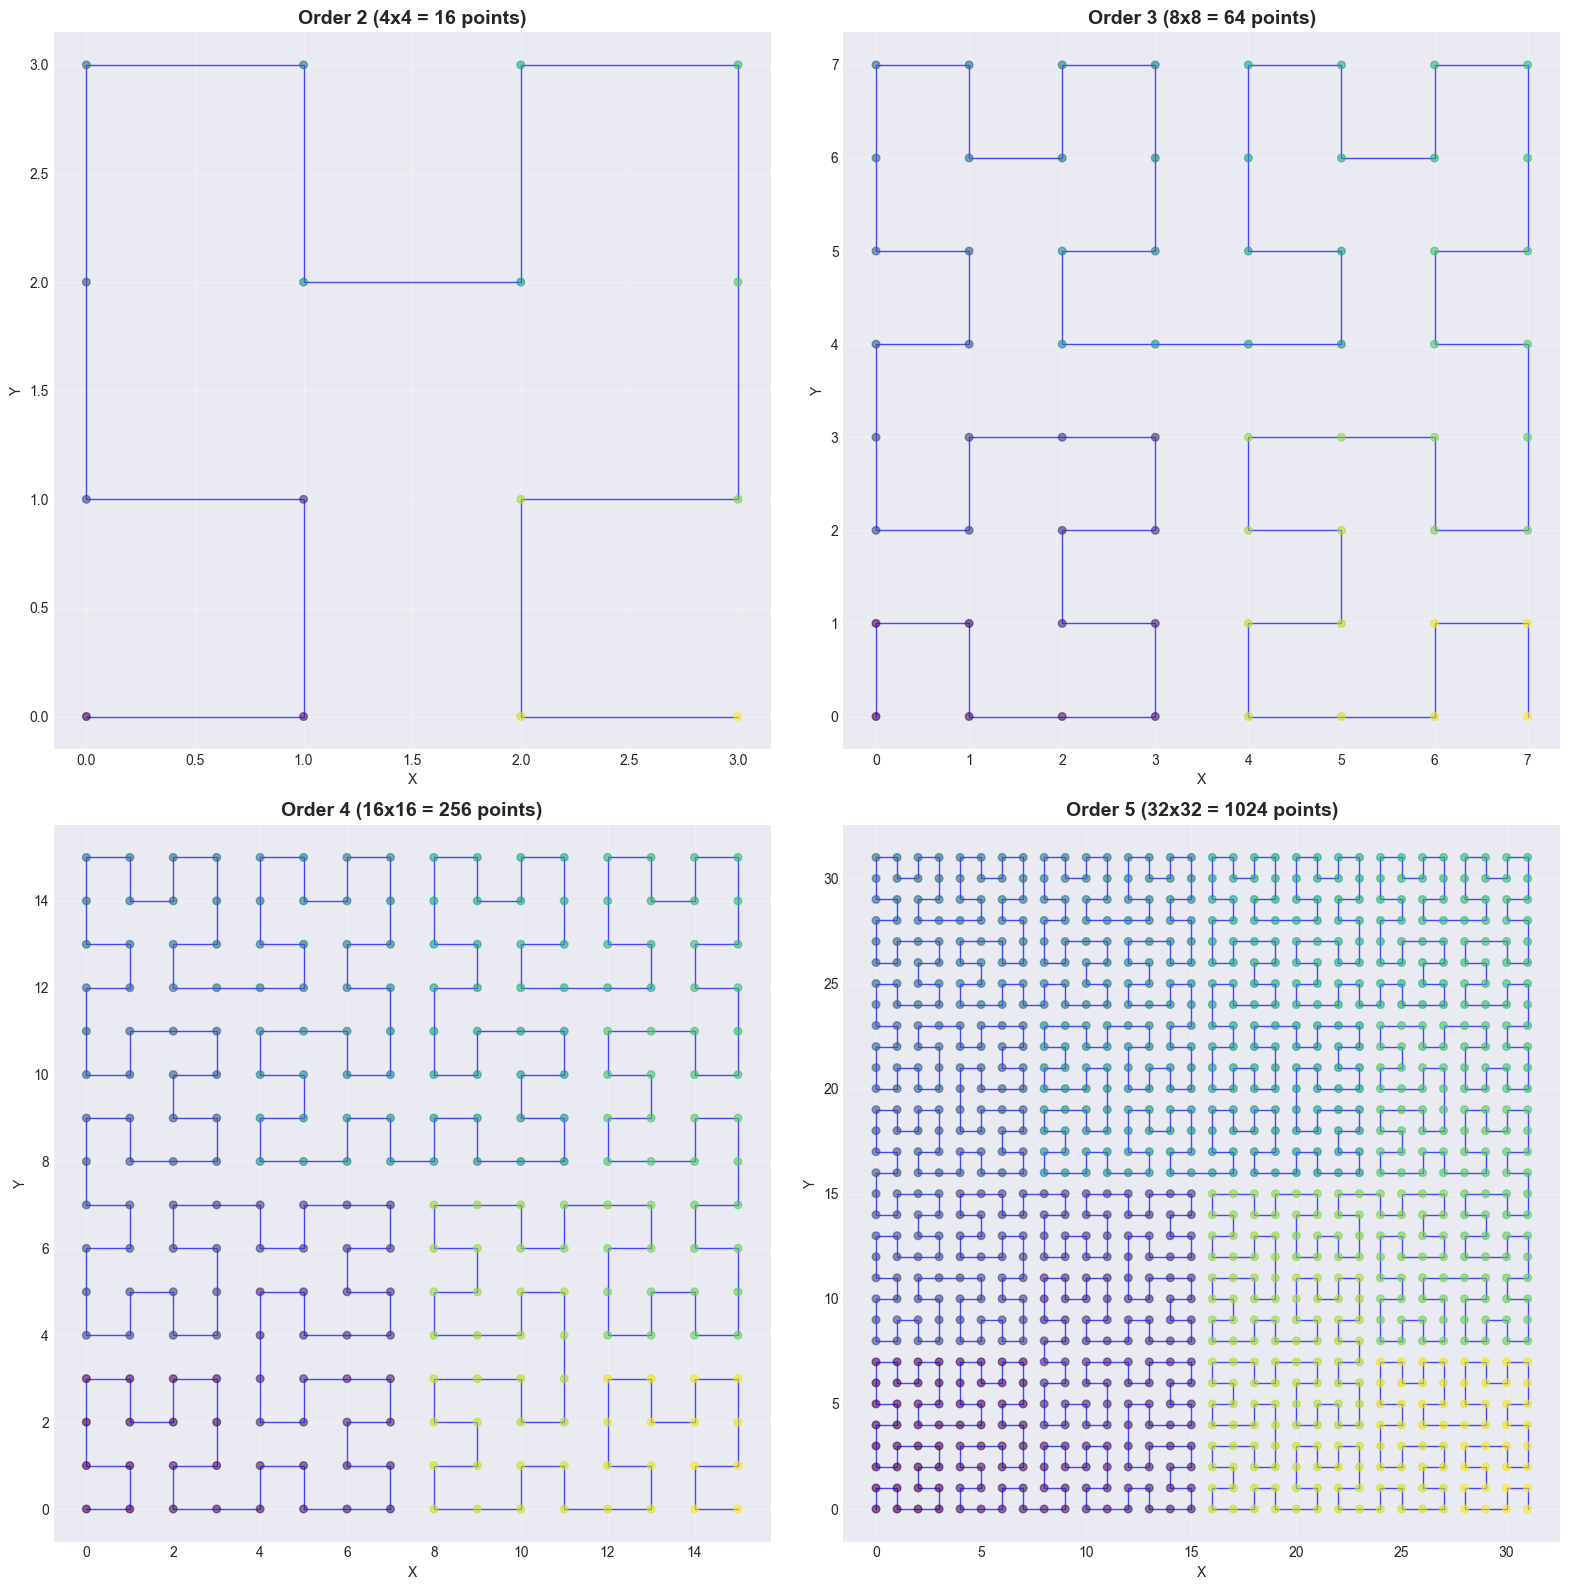

Notice how the curve becomes more complex as order increases!


In [2]:
# Generate curves of different orders
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
orders = [2, 3, 4, 5]

for idx, order in enumerate(orders):
    ax = axes[idx // 2, idx % 2]
    
    hc = HilbertCurve(order=order, use_gpu=False)
    x_coords, y_coords = hc.generate_curve()
    
    ax.plot(x_coords, y_coords, 'b-', linewidth=1, alpha=0.7)
    ax.scatter(x_coords, y_coords, c=range(len(x_coords)), 
               cmap='viridis', s=30, alpha=0.6, zorder=5)
    ax.set_title(f'Order {order} ({2**order}x{2**order} = {(2**order)**2} points)',
                fontsize=14, fontweight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('../../results/hilbert_curves_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Notice how the curve becomes more complex as order increases!")

## 2. GPU Performance Benchmark

Test your GPU's computational capabilities by comparing CPU vs GPU performance.

In [3]:
# Benchmark GPU performance
print("Running GPU/CPU performance comparison...\n")
results = benchmark_gpu_performance(orders=[4, 5, 6, 7, 8])

# Visualize results
if any(results['gpu_times']):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot computation times
    ax1.plot(results['orders'], results['cpu_times'], 
             'o-', label='CPU', linewidth=2, markersize=8)
    if all(t is not None for t in results['gpu_times']):
        ax1.plot(results['orders'], results['gpu_times'], 
                 's-', label='GPU', linewidth=2, markersize=8)
    ax1.set_xlabel('Curve Order', fontsize=12)
    ax1.set_ylabel('Time (seconds)', fontsize=12)
    ax1.set_title('Computation Time Comparison', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    ax1.set_yscale('log')
    
    # Plot speedup
    if all(s is not None for s in results['speedups']):
        ax2.bar(results['orders'], results['speedups'], 
                color='green', alpha=0.7, edgecolor='black')
        ax2.axhline(y=1, color='red', linestyle='--', 
                    linewidth=2, label='No speedup')
        ax2.set_xlabel('Curve Order', fontsize=12)
        ax2.set_ylabel('Speedup (CPU time / GPU time)', fontsize=12)
        ax2.set_title('GPU Speedup Factor', fontsize=14, fontweight='bold')
        ax2.legend(fontsize=11)
        ax2.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for i, v in enumerate(results['speedups']):
            if v is not None:
                ax2.text(results['orders'][i], v + 0.1, f'{v:.2f}x',
                        ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../../results/gpu_benchmark.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("GPU not available. Install cupy-cuda12x for GPU support.")

Running GPU/CPU performance comparison...

GPU Performance Benchmark

Testing order 4 (16x16 = 256 points)
  CPU: Initialized Hilbert Curve (order=4, size=16x16)
Computing on: CPU
Generated 256 points in 0.0000s (CPU)
0.0000s
  GPU: Not available

Testing order 5 (32x32 = 1,024 points)
  CPU: Initialized Hilbert Curve (order=5, size=32x32)
Computing on: CPU
Generated 1,024 points in 0.0015s (CPU)
0.0015s
  GPU: Not available

Testing order 6 (64x64 = 4,096 points)
  CPU: Initialized Hilbert Curve (order=6, size=64x64)
Computing on: CPU
Generated 4,096 points in 0.0050s (CPU)
0.0050s
  GPU: Not available

Testing order 7 (128x128 = 16,384 points)
  CPU: Initialized Hilbert Curve (order=7, size=128x128)
Computing on: CPU
Generated 16,384 points in 0.0297s (CPU)
0.0297s
  GPU: Not available

Testing order 8 (256x256 = 65,536 points)
  CPU: Initialized Hilbert Curve (order=8, size=256x256)
Computing on: CPU
Generated 65,536 points in 0.1043s (CPU)
0.1043s
  GPU: Not available

Benchmark Su

## 3. Visualize Synthetic Data

Let's create some synthetic patterns to understand how data maps to the Hilbert curve.

Initialized Hilbert Curve (order=6, size=64x64)
Computing on: CPU
Mapped 4,096 values to 2D grid in 0.0036s
Mapped 4,096 values to 2D grid in 0.0041s
Mapped 4,096 values to 2D grid in 0.0046s
Mapped 4,096 values to 2D grid in 0.0048s


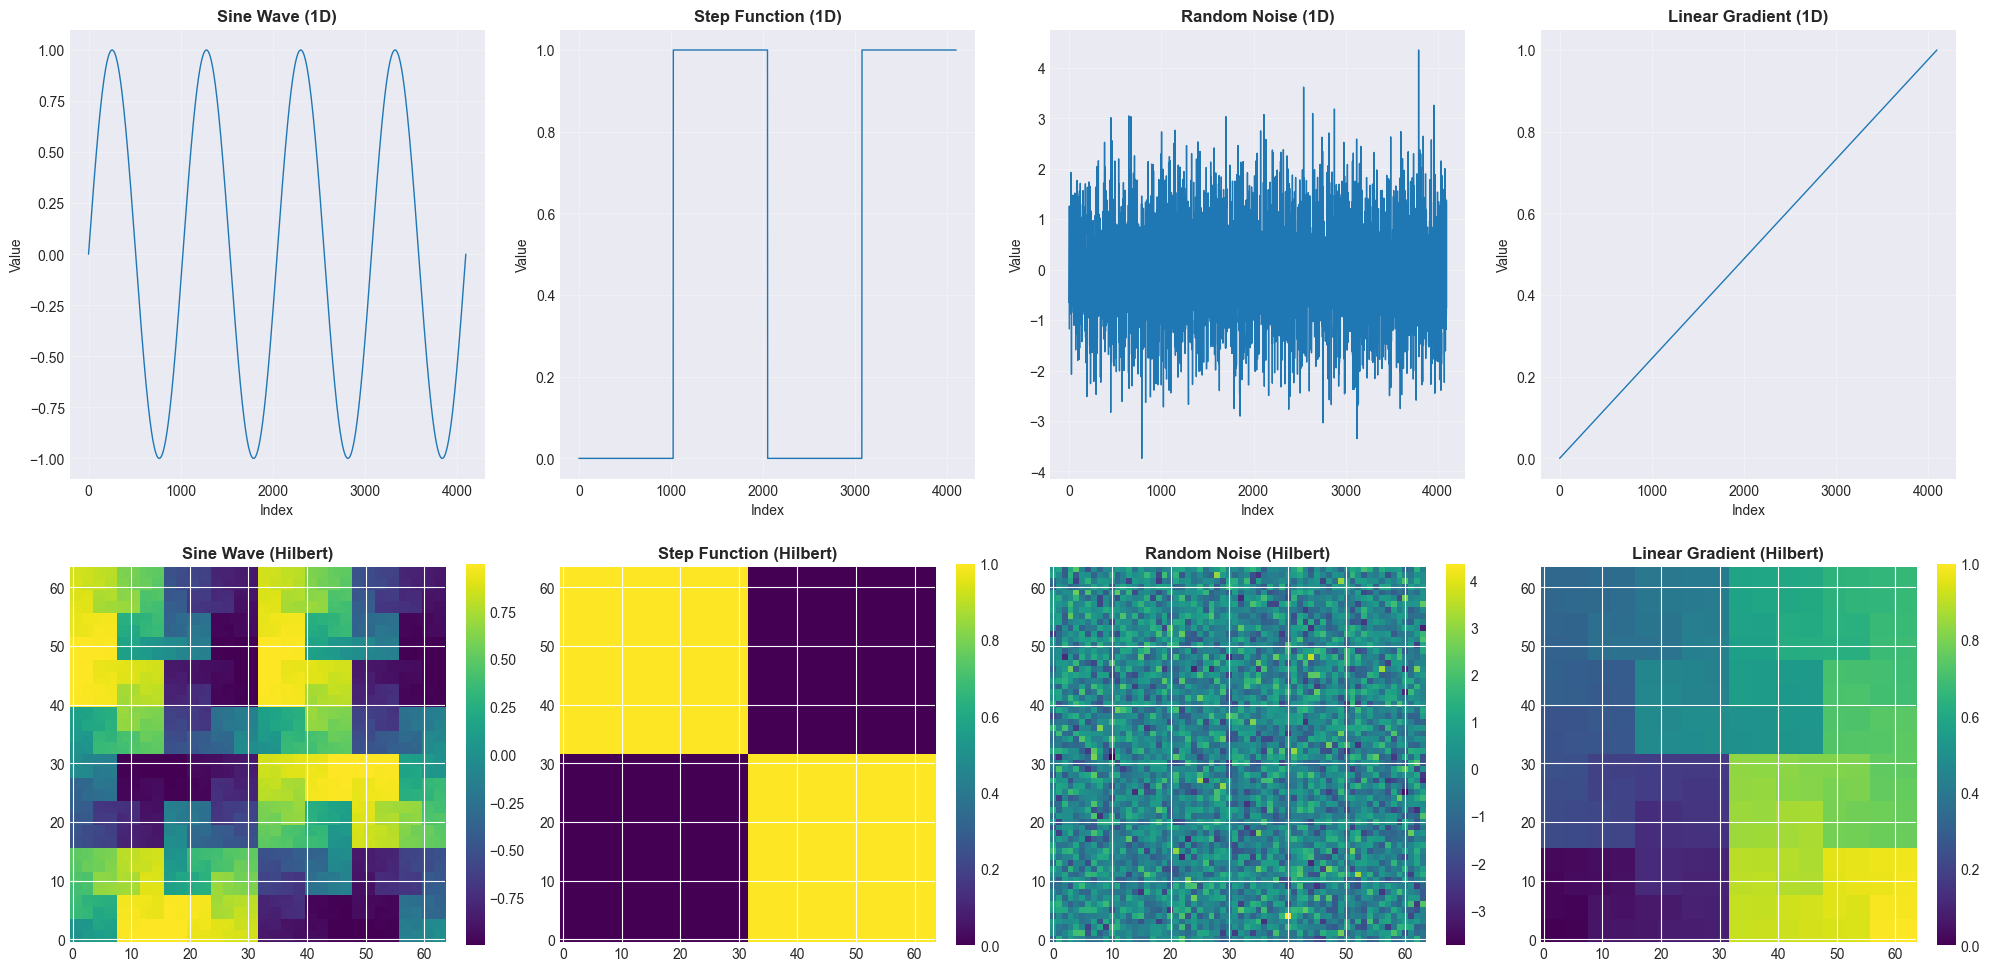

Notice how patterns in 1D are preserved in 2D space!


In [4]:
hc = HilbertCurve(order=6, use_gpu=True)
n_points = 2**6 * 2**6  # 4096 points

# Create different patterns
patterns = {
    'Sine Wave': np.sin(np.linspace(0, 8*np.pi, n_points)),
    'Step Function': np.concatenate([
        np.zeros(n_points//4),
        np.ones(n_points//4),
        np.zeros(n_points//4),
        np.ones(n_points//4)
    ]),
    'Random Noise': np.random.randn(n_points),
    'Linear Gradient': np.linspace(0, 1, n_points)
}

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for idx, (name, data) in enumerate(patterns.items()):
    # 1D view
    ax1 = axes[0, idx]
    ax1.plot(data, linewidth=1)
    ax1.set_title(f'{name} (1D)', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Index')
    ax1.set_ylabel('Value')
    ax1.grid(True, alpha=0.3)
    
    # 2D Hilbert mapping
    ax2 = axes[1, idx]
    grid = hc.map_data_to_curve(data)
    im = ax2.imshow(grid, cmap='viridis', interpolation='nearest', origin='lower')
    ax2.set_title(f'{name} (Hilbert)', fontsize=12, fontweight='bold')
    plt.colorbar(im, ax=ax2, fraction=0.046)

plt.tight_layout()
plt.savefig('../../results/hilbert_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("Notice how patterns in 1D are preserved in 2D space!")

## 4. Visualize Model Predictions (Synthetic)

Create synthetic predictions to demonstrate how to visualize model outputs.

Initialized Hilbert Curve (order=6, size=64x64)
Computing on: CPU

Model Prediction Visualization
Mapped 4,096 values to 2D grid in 0.0072s
Saved visualization to ../../results/predictions_hilbert.png


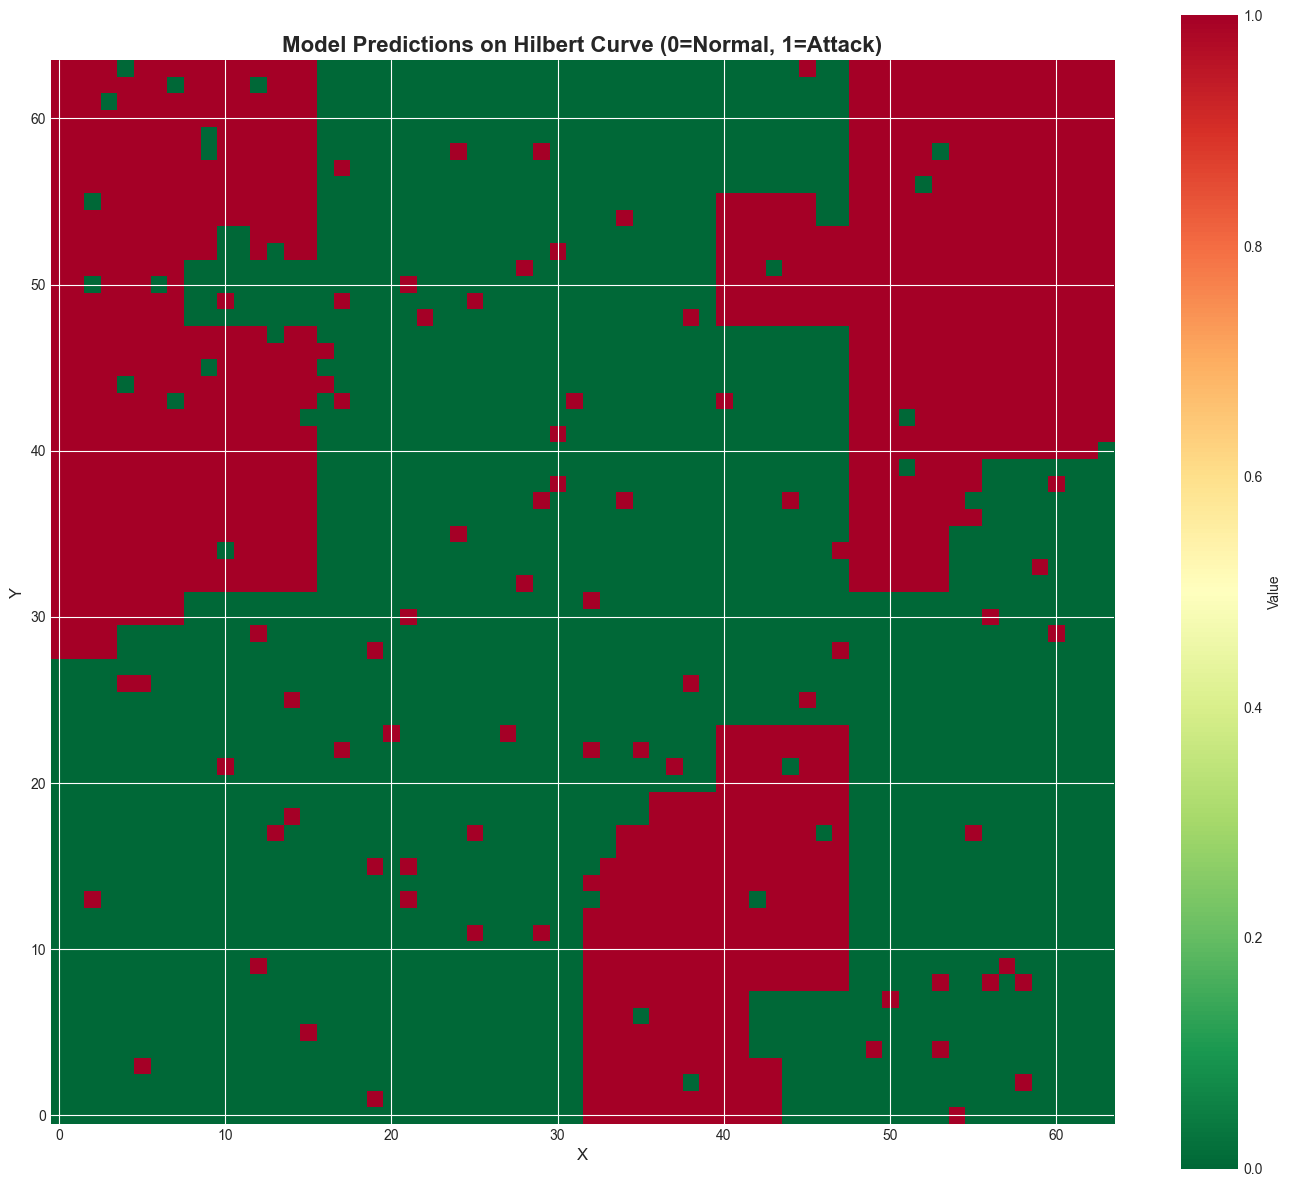

Mapped 4,096 values to 2D grid in 0.0048s
Saved visualization to ../../results/labels_hilbert.png


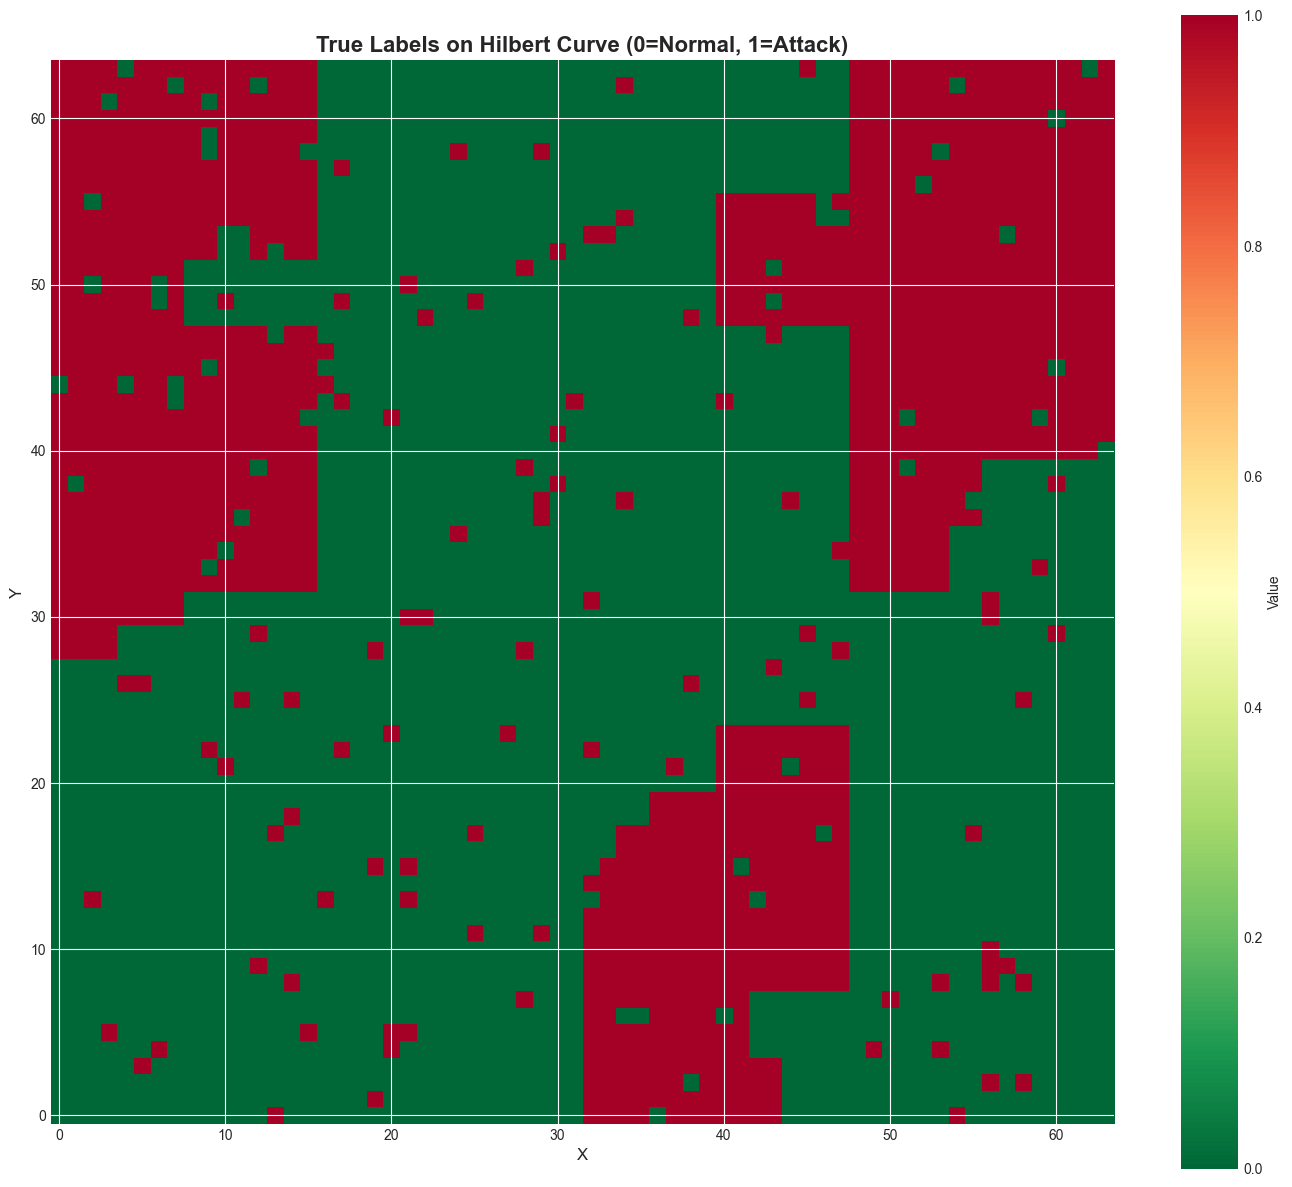

Mapped 4,096 values to 2D grid in 0.0050s
Saved visualization to ../../results/errors_hilbert.png


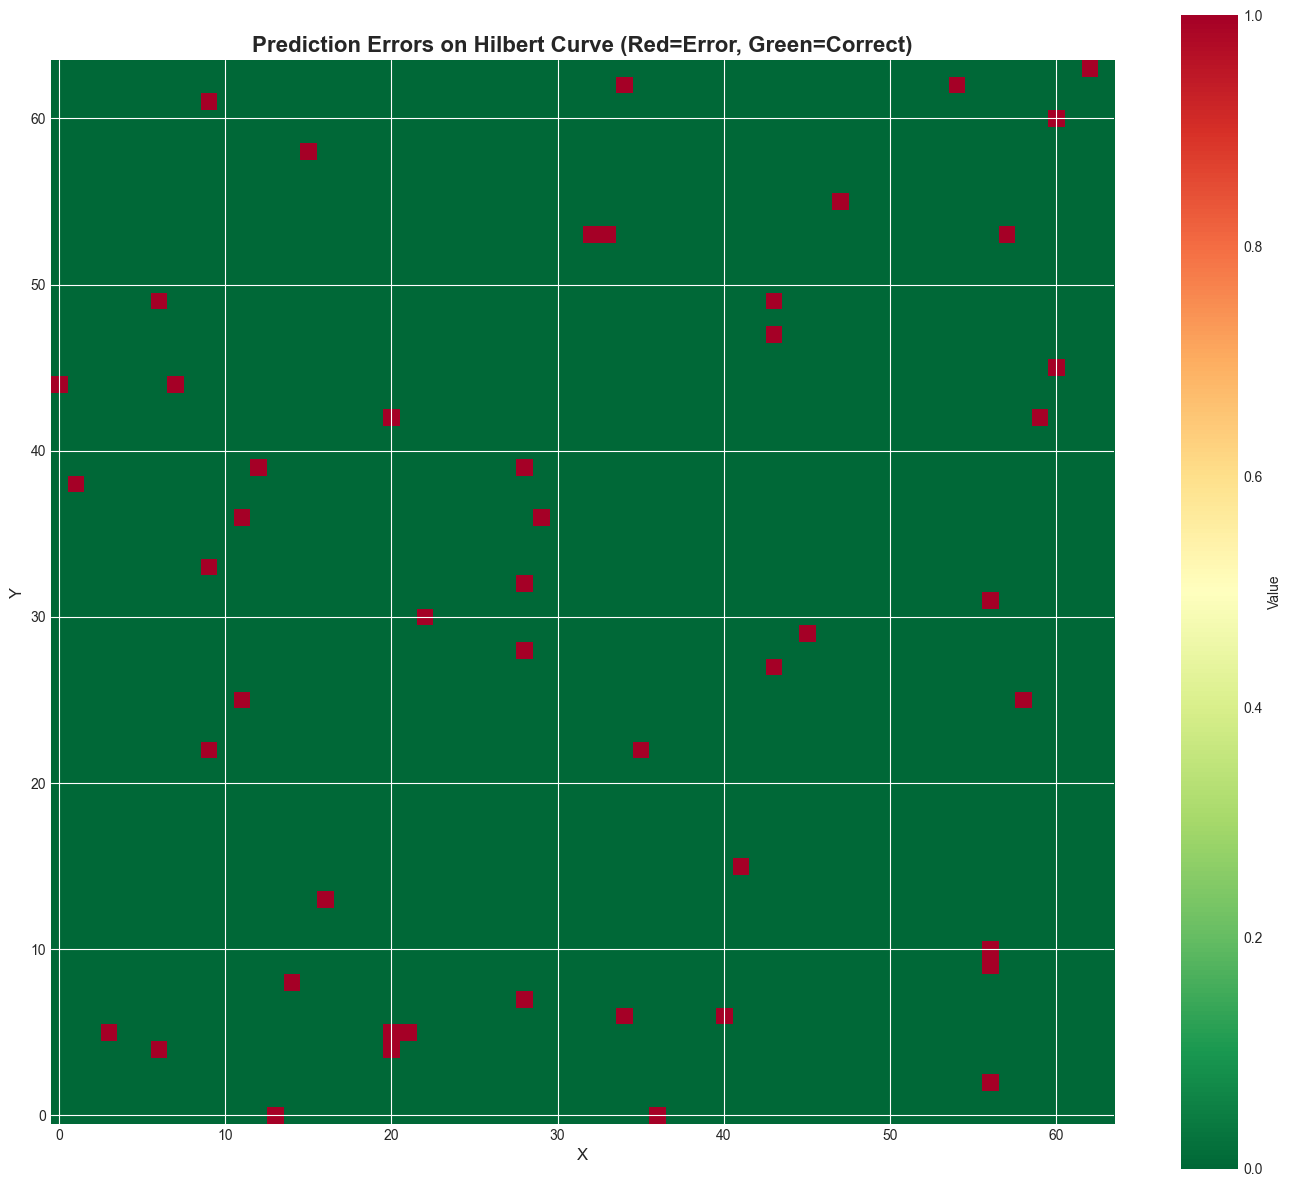


✓ Generated visualizations:
  - predictions_hilbert.png: Model predictions
  - labels_hilbert.png: True labels
  - errors_hilbert.png: Prediction errors (misclassifications)



In [5]:
# Generate synthetic predictions
n_samples = 4096

# Create patterns: normal traffic followed by attacks
predictions = np.zeros(n_samples)
predictions[1000:1500] = 1  # Attack cluster 1
predictions[2500:3000] = 1  # Attack cluster 2
predictions[3500:3800] = 1  # Attack cluster 3

# Add some noise (false positives/negatives)
noise_indices = np.random.choice(n_samples, size=100, replace=False)
predictions[noise_indices] = 1 - predictions[noise_indices]

# Create true labels (slightly different)
labels = predictions.copy()
error_indices = np.random.choice(n_samples, size=50, replace=False)
labels[error_indices] = 1 - labels[error_indices]

# Visualize
visualize_model_predictions(
    predictions=predictions,
    labels=labels,
    order=6,
    use_gpu=True,
    save_dir='../../results'
)

print("""\n✓ Generated visualizations:
  - predictions_hilbert.png: Model predictions
  - labels_hilbert.png: True labels
  - errors_hilbert.png: Prediction errors (misclassifications)\n""")

## 5. Load and Visualize Real Model Predictions

Now let's use actual model predictions from your trained models.

In [6]:
# Example: Load predictions from a saved model
# Uncomment and modify the path to use your actual model

"""
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your trained model
model_path = '../../results/models/cnn_nsl_kdd_best.h5'
model = tf.keras.models.load_model(model_path)

# Load test data
X_test = pd.read_csv('../../data/processed/NSL_KDD/Test/X_test.csv')
y_test = pd.read_csv('../../data/processed/NSL_KDD/Test/y_test.csv')['label'].values

# Preprocess
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Make predictions
predictions_prob = model.predict(X_test_scaled)
predictions = (predictions_prob > 0.5).astype(int).flatten()

# Visualize on Hilbert curve
visualize_model_predictions(
    predictions=predictions[:8192],  # Use first 8192 samples (order 7)
    labels=y_test[:8192],
    order=7,
    use_gpu=True,
    save_dir='../../results/model_viz'
)

# Calculate metrics
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test[:8192], predictions[:8192], 
                          target_names=['Normal', 'Attack']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test[:8192], predictions[:8192]))
"""

print("""\nTo use real model predictions:
1. Uncomment the code above
2. Update the model_path to your trained model
3. Update data paths to your test set
4. Run the cell!""")


To use real model predictions:
1. Uncomment the code above
2. Update the model_path to your trained model
3. Update data paths to your test set
4. Run the cell!


## 6. Interactive Exploration

Create your own custom visualizations.

Initialized Hilbert Curve (order=7, size=128x128)
Computing on: CPU
Mapped 16,384 values to 2D grid in 0.0230s
Saved visualization to ../../results/my_custom_viz_order7.png


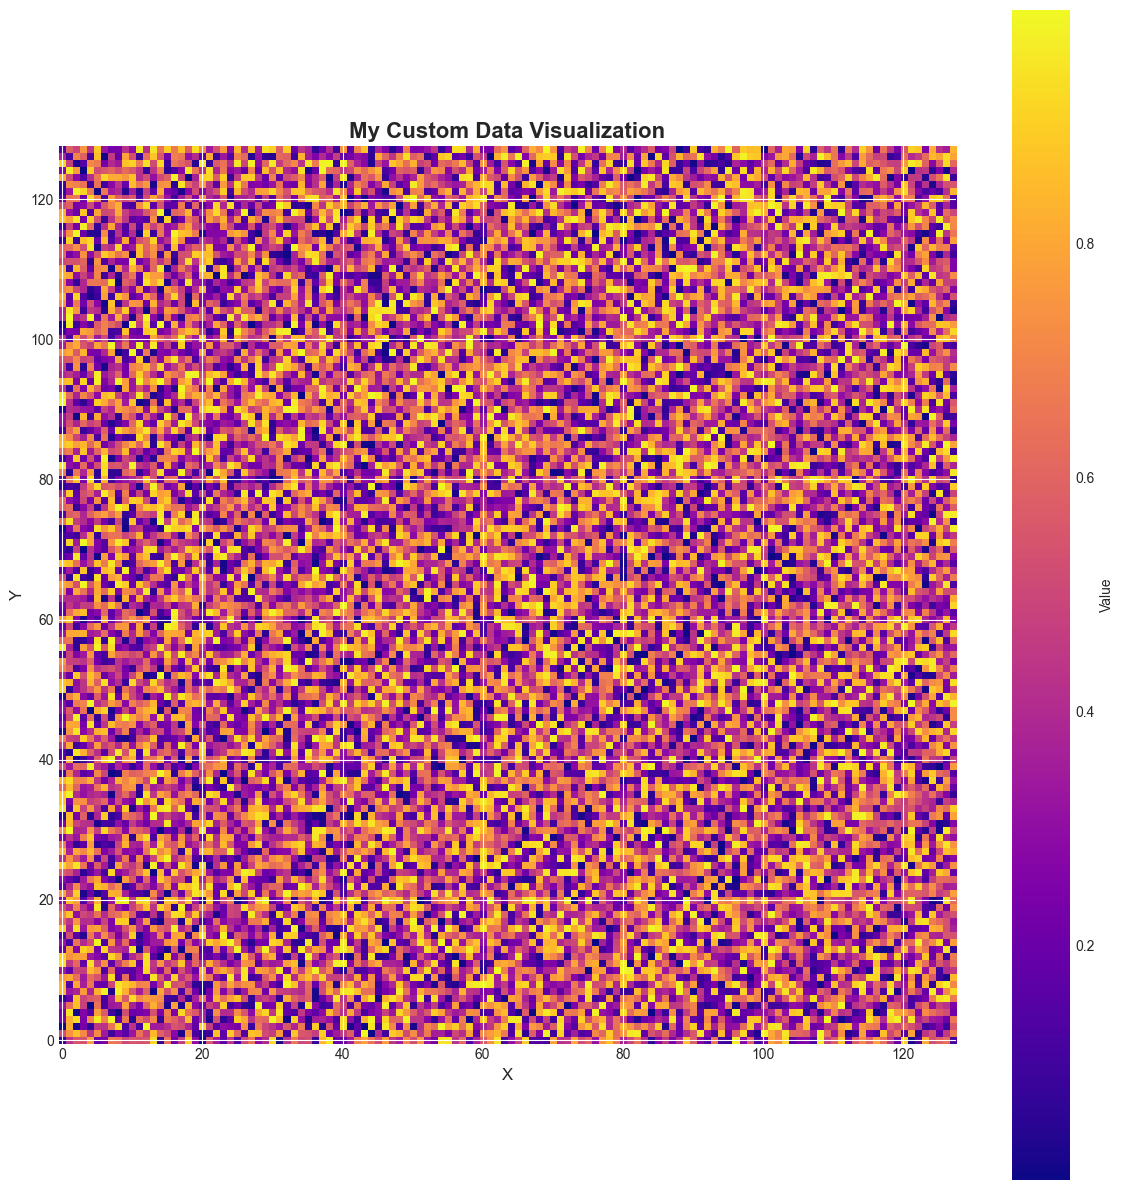

✓ Created visualization with 16,384 points!


In [7]:
# Create a custom Hilbert curve visualization
order = 7  # Adjust this (2-8 recommended)
use_gpu = True  # Set to False if no GPU

hc = HilbertCurve(order=order, use_gpu=use_gpu)

# Option 1: Visualize the curve itself
# hc.visualize_curve(save_path=f'../../results/my_hilbert_order{order}.png')

# Option 2: Visualize custom data
n_points = (2**order) ** 2
custom_data = np.random.rand(n_points)  # Replace with your data
hc.visualize_data(
    custom_data,
    title="My Custom Data Visualization",
    cmap='plasma',  # Try: viridis, plasma, inferno, magma, RdYlGn
    save_path=f'../../results/my_custom_viz_order{order}.png'
)

print(f"✓ Created visualization with {n_points:,} points!")

## Summary

In this notebook, you learned how to:

✅ Generate Hilbert space-filling curves of different orders  
✅ Benchmark GPU vs CPU performance  
✅ Map 1D data to 2D Hilbert space  
✅ Visualize synthetic and real model predictions  
✅ Identify patterns and clusters in network traffic  

### Next Steps:

1. **Test with your models**: Load predictions from your CNN, LSTM, or Transformer models
2. **Experiment with orders**: Try different orders (7-8 for large datasets)
3. **GPU testing**: Use this for GPU stress testing and performance benchmarking
4. **Pattern analysis**: Look for temporal patterns in attack sequences

### Tips:

- **Order selection**: Use `order = ceil(log2(sqrt(n_samples)))` for optimal fit
- **GPU acceleration**: Install `cupy-cuda12x` for CUDA 12.x or `cupy-cuda11x` for CUDA 11.x
- **Memory**: Higher orders require more memory (order 10 = 1M points)
- **Colormaps**: Use diverging colormaps (RdYlGn) for binary data, sequential (viridis) for continuous